# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


In [ ]:
pip install --upgrade pip

In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [7]:
#pip install tesseract-ocr

In [8]:
 pytesseract.pytesseract.tesseract_cmd = 'C:/Users/vincentLee1231995/OneDrive/Documents/Personal/Crawling-in-60Days/Homework/Day_31/Tesseract-OCR/tesseract.exe'

### 讀讀看「test」資料夾下的圖檔！

In [9]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

### 像 test/test2.png 這種複雜的圖片怎麼辦？

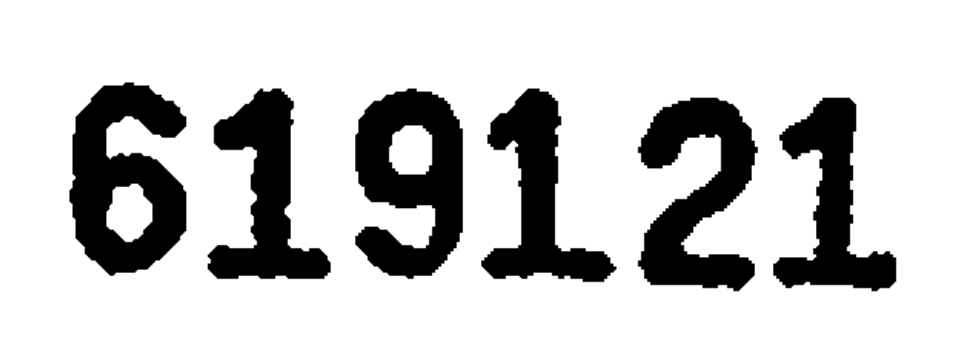

In [2]:
img_1 = Image.open("test1.png").convert("L")
img_1

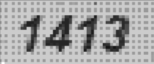

In [3]:
img_2 = Image.open("test2.png").convert("L")
img_2

In [10]:
code = pytesseract.image_to_string(img_1)
print(code)

619121



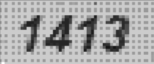

In [12]:
img_2 = Image.open("test2.png").convert("L")
img_2

In [13]:
code = pytesseract.image_to_string(img_2)
print(code)

4413



### 将图片进行降噪处理, 通过二值化去掉后面的背景色并加深文字对比度

In [14]:
def convert_Image(img, standard=127.5):  #閥值介於0~255之間
    '''
    【灰度转换】
    '''
    image = img.convert('L')

    '''
    【二值化】
    根据阈值 standard , 将所有像素都置为 0(黑色) 或 255(白色), 便于接下来的分割
    '''
    pixels = image.load()
    
    for x in range(image.width):
        for y in range(image.height):
            if pixels[x, y] > standard:  #高於閥值，直接取值255
                pixels[x, y] = 255
            else:
                pixels[x, y] = 0   #低於閥值，直接取值0
    return image

In [18]:
img_2_amplify = convert_Image(img_2)

In [19]:
code = pytesseract.image_to_string(img_2_amplify)
print(code)

1413

